In [1]:
import sys
sys.path.insert(0, './src')
from matplotlib import pyplot as plt

from multiply_connected_pipe import Boundary, MultiplyConnectedPipeFromBoundaries

from curve import *
from pipe import *
from pipe.smooth_pipe import SmoothPipe
from utils import *

from matplotlib.path import Path


In [2]:
p1 = pt(-8,1)
p2 = pt(8,1)
p3 = pt(8,-1)
p4 = pt(-8,-1)

pts = [p1, p2, p3, p4]

l1 = Line
l2 = Cap
l3 = Line
l4 = Cap

ls = [l1, l2, l3, l4]

In [3]:
pipe = SmoothPipe(pts, ls)
pipe.build_geometry()
b1 = Boundary(pipe.curves)

In [4]:
c1 = Circle(.2, pt(1,0.5))
c2 = Circle(.2, pt(-3,0))
c3 = Circle(.2, pt(3,-0.5))

c = [c1,c2,c3]
# c = [c1]
[ci.build() for ci in c];

In [5]:
bs = [Boundary([ci]) for ci in c]
bs.append(b1)

In [6]:
the_pipe = MultiplyConnectedPipeFromBoundaries(bs)

In [7]:
the_pipe.build(tol=1e-13)

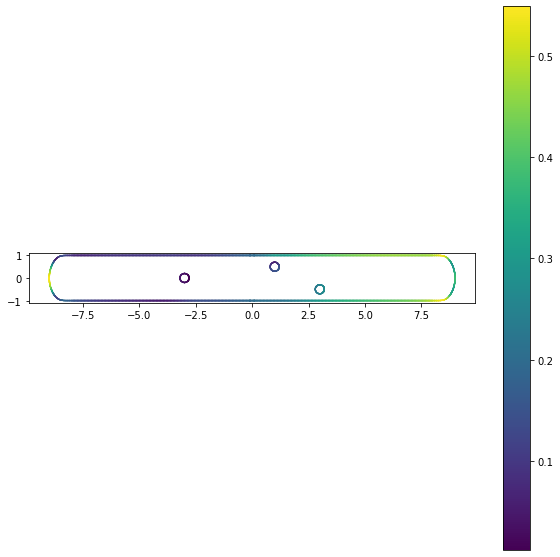

In [8]:
t = the_pipe.t
x = t.real
y = t.imag

fig, ax = plt.subplots(figsize=(10,10))
fig.colorbar(ax.scatter(x, y,s=0.1,c=np.abs(the_pipe.omegas[0])))
# fig.colorbar(ax.scatter(x, y,s=0.1,c=-u.imag))
ax.set_aspect('equal')
# ax.scatter(xs, ys,s=1,c='r')

Text(0.5, 0.98, 'color=poiseuille boundary value')

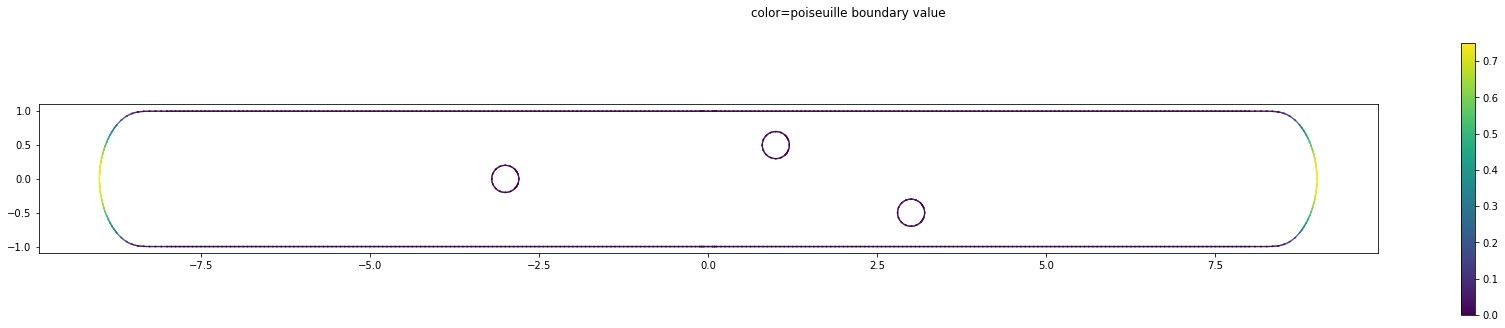

In [9]:
t = the_pipe.t
x = t.real
y = t.imag

fig, ax = plt.subplots(figsize=(30,5))
fig.colorbar(ax.scatter(x, y,s=0.1,c=-the_pipe.boundary_value(0).imag))
ax.set_aspect('equal')
fig.suptitle('color=poiseuille boundary value')

In [10]:
xs = np.linspace(-9,9,500)
ys = np.linspace(-1,1,100)
xs,ys = np.meshgrid(xs,ys)

xs = xs
ys = ys

In [11]:
m = Path(np.array((the_pipe.exterior_boundary.t.real, the_pipe.exterior_boundary.t.imag)).T).contains_points(np.array([xs.ravel(),ys.ravel()]).T)
for ci in c:
    pts = np.array([ci.t.real,ci.t.imag]).T
    m &= ~Path(pts).contains_points(np.array([xs.ravel(),ys.ravel()]).T)
m = m.reshape(xs.shape)

In [12]:
U = the_pipe.velocity(xs[m].ravel(),ys[m].ravel(),the_pipe.omegas[0])

In [13]:
p = the_pipe.pressure(xs[m].ravel(),ys[m].ravel(),the_pipe.omegas[0])

In [14]:
u = np.zeros_like(xs)
v = np.zeros_like(xs)
pressure = np.zeros_like(xs)

In [15]:
u[m] = U[:,0]
v[m] = U[:,1]
pressure[m] = p
pressure[~m] = np.nan
u[~m] = np.nan
v[~m] = np.nan

In [16]:
bp = pressure[np.where(~np.isnan(pressure))].mean()
pressure -= bp

Text(0.5, 0.98, 'color = |velocity|,\nblack arrow     = boundary condition')

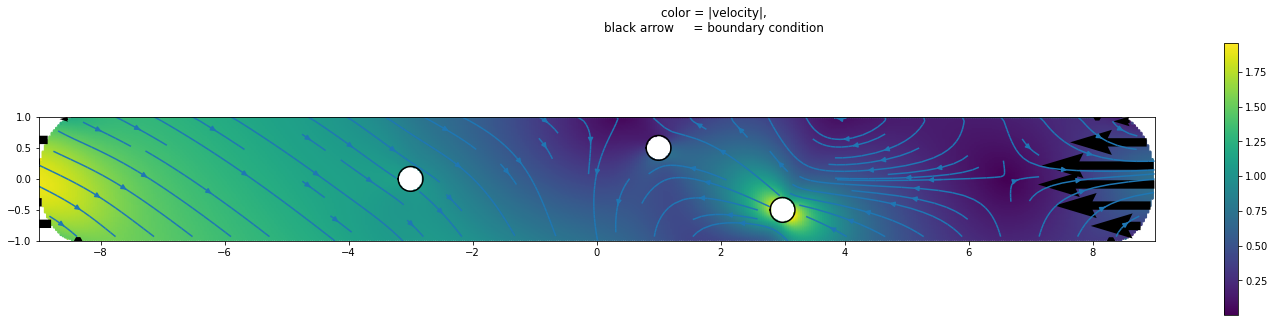

In [17]:
t = the_pipe.t
x = t.real
y = t.imag

fig, ax = plt.subplots(figsize=(25,5))
# ax.scatter(x, y,s=0.1,c=np.abs(the_pipe.omegas[0]))
fig.set_facecolor("white")
ax.set_aspect('equal')

ax.streamplot(xs,ys,u,v)

fig.colorbar(ax.scatter(xs, ys,s=4,c=np.sqrt(u**2+v**2)))

m1 = (y!= 1) & (y!=-1) & (np.abs(x) >7)

bu = the_pipe.boundary_value(0).imag[m1]
bv = -the_pipe.boundary_value(0).real[m1]
N = 100
ax.quiver(x[m1][::100], y[m1][::100],bu[::100],bv[::100])

for ci in c:
    ax.plot(ci.t.real,ci.t.imag,c='black')
fig.suptitle('color = |velocity|,\nblack arrow     = boundary condition')

Text(0.5, 0.98, 'color = |velocity|,\nblack arrow     = boundary condition')

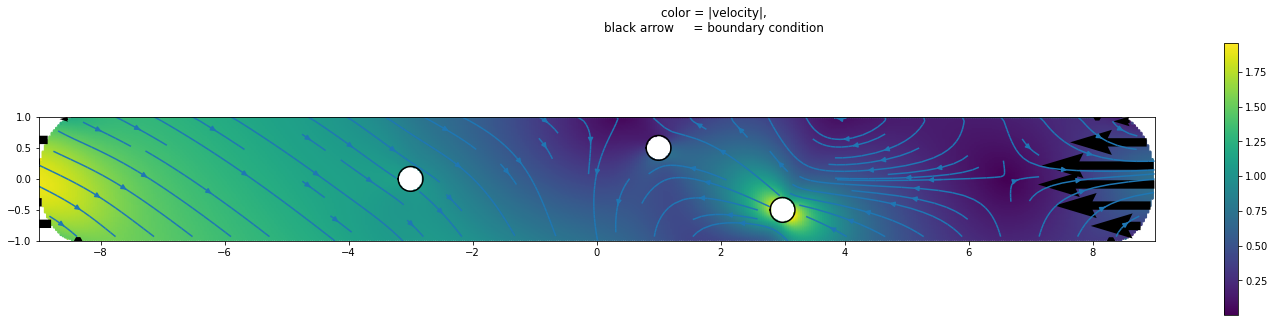

In [18]:
t = the_pipe.t
x = t.real
y = t.imag

fig, ax = plt.subplots(figsize=(25,5))
# ax.scatter(x, y,s=0.1,c=np.abs(the_pipe.omegas[0]))
fig.set_facecolor("white")
ax.set_aspect('equal')

ax.streamplot(xs,ys,u,v)

fig.colorbar(ax.scatter(xs, ys,s=4,c=np.sqrt(u**2+v**2)))

m1 = (y!= 1) & (y!=-1) & (np.abs(x) >7)

bu = the_pipe.boundary_value(0).imag[m1]
bv = -the_pipe.boundary_value(0).real[m1]
N = 100
ax.quiver(x[m1][::100], y[m1][::100],bu[::100],bv[::100])

for ci in c:
    ax.plot(ci.t.real,ci.t.imag,c='black')
fig.suptitle('color = |velocity|,\nblack arrow     = boundary condition')

Text(0.5, 0.98, 'color = |velocity|,\nblack arrow     = boundary condition')

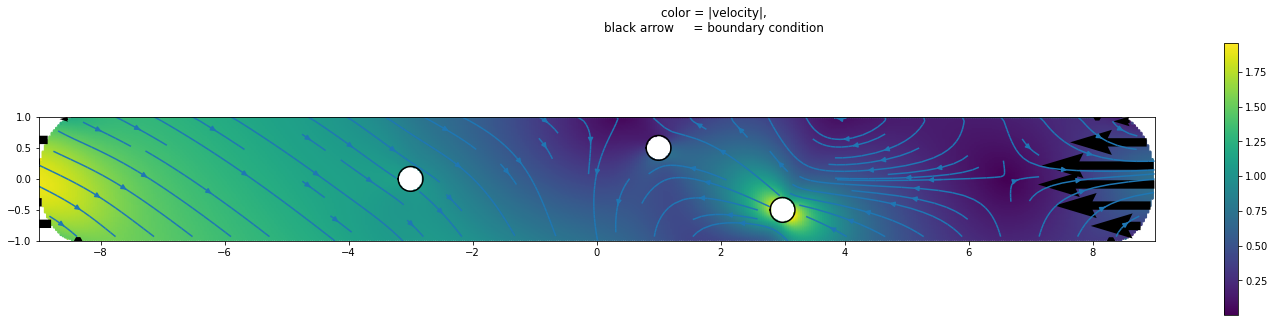

In [19]:
t = the_pipe.t
x = t.real
y = t.imag

fig, ax = plt.subplots(figsize=(25,5))
# ax.scatter(x, y,s=0.1,c=np.abs(the_pipe.omegas[0]))
fig.set_facecolor("white")
ax.set_aspect('equal')

ax.streamplot(xs,ys,u,v)

fig.colorbar(ax.scatter(xs, ys,s=4,c=np.sqrt(u**2+v**2)))

m1 = (y!= 1) & (y!=-1) & (np.abs(x) >7)

bu = the_pipe.boundary_value(0).imag[m1]
bv = -the_pipe.boundary_value(0).real[m1]
N = 100
ax.quiver(x[m1][::100], y[m1][::100],bu[::100],bv[::100])

for ci in c:
    ax.plot(ci.t.real,ci.t.imag,c='black')
fig.suptitle('color = |velocity|,\nblack arrow     = boundary condition')

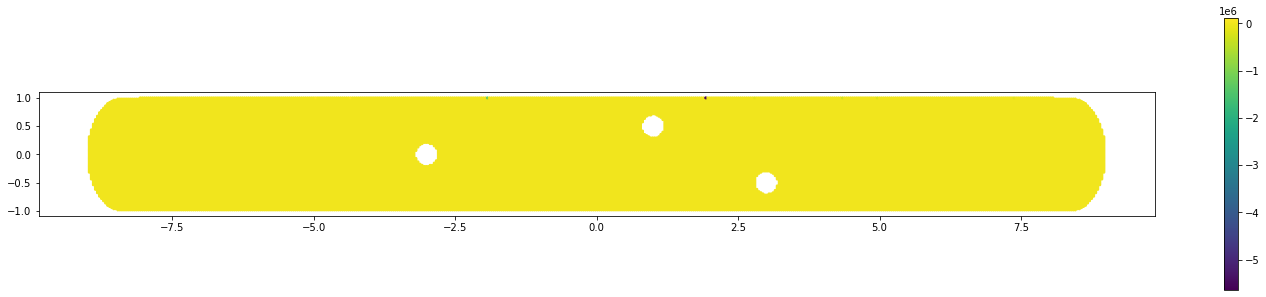

In [20]:
fig, ax = plt.subplots(figsize=(25,5))
# ax.scatter(x, y,s=0.1,c=np.abs(the_pipe.omegas[0]))
fig.set_facecolor("white")
ax.set_aspect('equal')


fig.colorbar(ax.scatter(xs, ys,s=4,c=pressure))


I honestly don't understand how pressure get so bit. 

In [21]:
omega = the_pipe.omegas[0]